In [2]:
#Initializing libraries
%pip install datasets nltk
%pip install skorch
%pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=139e36d89877afdf8805249d1332cf5ec59c1c48e3600016f9de780656045525
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
#Used imports

#General imports
from datasets import load_dataset
import numpy as np
import pandas as pd
import string

#Data analysis imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import eli5
from eli5.base import WeightedSpan

#Data processing imports
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

#Scikit-learn imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_multilabel_classification

#PyTorch imports
import torch
from torch import nn
import torch.nn as nn
import torch.nn.functional as F
from skorch import NeuralNetClassifier

In [4]:
#Downloading the dataset from URL: https://huggingface.co/datasets/yelp_review_full
dataset = load_dataset('yelp_review_full')

Generating train split:   0%|          | 0/650000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [5]:
#Exploring the dataset
print("Type of dataset: {}".format(type(dataset)))
print("Length of training dataset: {}".format(len(dataset['train'])))
print("Length of testing dataset: {}".format(len(dataset['test'])))
print("Exemplary entry of dataset: {}".format(dataset['train'][5]))

Type of dataset: <class 'datasets.dataset_dict.DatasetDict'>
Length of training dataset: 650000
Length of testing dataset: 50000
Exemplary entry of dataset: {'label': 4, 'text': "Top notch doctor in a top notch practice. Can't say I am surprised when I was referred to him by another doctor who I think is wonderful and because he went to one of the best medical schools in the country. \\nIt is really easy to get an appointment. There is minimal wait to be seen and his bedside manner is great."}


In [6]:
#Splitting and encoding the data

#Splitting the text data into small and large training/testing sets
x_train = (dataset['train']['text'])
x_test = (dataset['test']['text'])
x_train_small = np.array(dataset['train']['text'][:20000]) #16'000 initially
x_test_small = np.array(dataset['test']['text'][:4000]) #4'000 initially

#Encoding the label data and splitting it into small and large sets
le = LabelEncoder()
y_train_encoded = le.fit_transform(dataset['train']['label'])
y_test_encoded = le.fit_transform(dataset['test']['label'])
y_train_encoded_small = y_train_encoded[:20000] #16'000 initially
y_test_encoded_small = y_test_encoded[:4000] #4'000 initially

#Ensuring same sized data
print(len(x_train_small))
print(len(y_train_encoded_small))
print(len(x_test_small))
print(len(y_test_encoded_small))

20000
20000
4000
4000


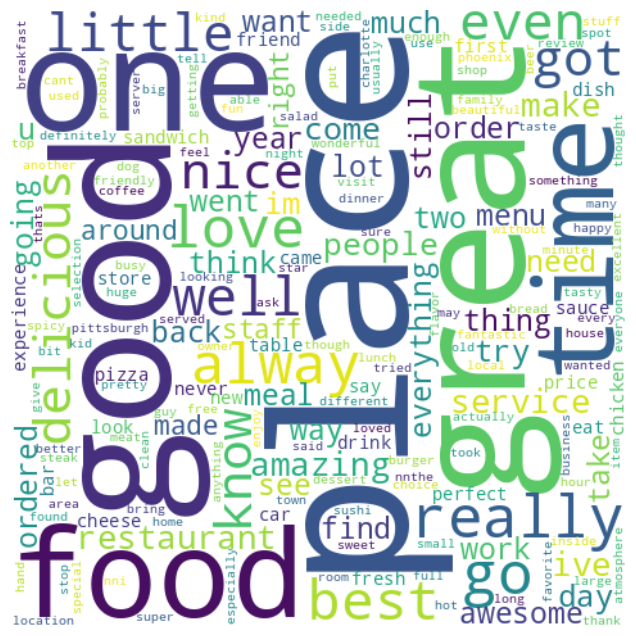

In [42]:
#Data exploration using word clouds

#Creating a dataframe for easy filtering
df= pd.DataFrame({'text': x_train_small, 'label': (dataset['train']['label'][:20000])}) #16'000 initially
df5 = df[df['label'] == 4]
df1 = df[df['label'] == 0]

#Generating text for 5-star word cloud
text5 = ''
for text in df5.text:
  text5 = text5 + text

#Generating text for 1-star word cloud
text1 = ''
for text in df1.text:
  text1 = text1 + text

#Creating the word cloud objects
wordcloud_5_star = WordCloud(width=480, height=480, margin=0, background_color='white').generate(text5)
wordcloud_1_star = WordCloud(width=480, height=480, margin=0, background_color='white').generate(text1)


#Displaying the generated word clouds
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_5_star, interpolation="bilinear")
#plt.imshow(wordcloud_1_star, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [8]:
#Checking number of labels
print(le.classes_)

[0 1 2 3 4]


[[   0 3764]
 [   1 4223]
 [   2 4510]
 [   3 4119]
 [   4 3384]]


Text(0.5, 1.0, 'Distribution of Labels')

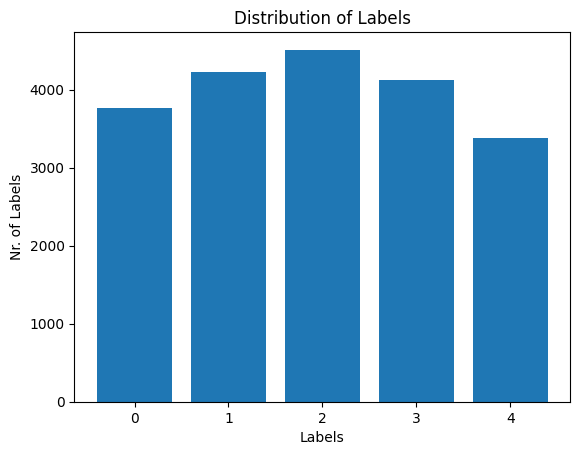

In [9]:
#Checking data distribution of labels of x_train_small
unique, counts = np.unique(y_train_encoded_small, return_counts=True)

print(np.asarray((unique, counts)).T)

plt.bar(unique, counts)
plt.xlabel("Labels")
plt.ylabel("Nr. of Labels")
plt.title("Distribution of Labels")



In [10]:
#Text processing
nltk.download('stopwords')
nltk.download('wordnet')

#Normalizing text to all lowercase
def normalization(X):
  return np.array([x.lower() for x in X])

#Removing stopwords
def stopword_removal(X):
  stop_words = stopwords.words('english')
  return np.array([' '.join([word for word in x.split() if word not in stop_words]) for x in X])

#Removing punctuation
def punctuation_removal(X):
   # Remove newline characters
    cleaned_text = np.array([x.replace('\n', ' ') for x in X])

    # Remove punctuation
    cleaned_text = np.array([''.join([char for char in x if char not in string.punctuation]) for x in cleaned_text])
    return cleaned_text

#Lemmatizing, i.e., converting words into their base form
def lemmatization(X):
  lemmatizer = WordNetLemmatizer()
  return np.array([' '.join([lemmatizer.lemmatize(word) for word in x.split()]) for x in X])

#Integrating all text processing functions
def text_processing(X):
  x_processed = X
  x_processed = normalization(x_processed)
  x_processed = stopword_removal(x_processed)
  x_processed = punctuation_removal(x_processed)
  x_processed = lemmatization(x_processed)
  return x_processed


x_train_small = text_processing(x_train_small)
x_test_small = text_processing(x_test_small)
print(len(x_test_small))
print(x_test_small)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


4000
['got new tire within two week got flat took car local mechanic see could get hole patched said reason flat previous patch blown wait what got tire never needed patched supposed new tire ni took tire flynns told someone punctured tire tried patch it resentful tire slasher find unlikely arguing guy telling logic far fetched said hed give new tire this time ni never go back flynns bc way guy treated simple fact gave used tire'
 'waste time two different people come house give u estimate deck one owner time never heard them call estimate nothing'
 'say worst 2 people place lunch place freezing loaded kid toy 2 bicycle scooter electronic keyboard graced dining room fish tank filthy slimy fingerprint smeared enjoymentnnour food came water drink tea medium temperature food course cold like room never took jacket off plate small food spill onto semiclean table sit completely worn booth seat fried noodle box nasty shrimp mushy fried rice bright yellownnwe asked water brought u 1 solo cup 

In [11]:
#Calculating the one-off accuracy for a list of predicted labels
def one_off_accuracy(y_true, y_pred):
    #Ensuring shape of input arrays
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)

    if y_true.shape != y_pred.shape:
        raise ValueError("The shape of ground truth and predicted values don't match.")

    #Initializing the counter for correct predictions
    correct_predictions = 0

    #Iterating through true and predicted class labels
    for true, pred in zip(y_true, y_pred):
        if true == pred:
            correct_predictions += 1
        else:
            if abs(true - pred) == 1:
                correct_predictions += 1

    #Calculating the one-off accuracy
    one_off_acc = correct_predictions / len(y_true)

    return one_off_acc


In [12]:
#Creating a universal text_preprocessing pipeline for our models

#Converting sparse matrix to dense matrix
def convert_to_dense(x):
    return x.toarray()

#Creating pipeline for text preprocessing
text_preprocessing = Pipeline([
    ('tfidvectorizer', TfidfVectorizer(dtype=np.float32, max_features = 700, ngram_range=(1, 2), min_df=20)), #Converting text data into TF-IDF features, max_features set to 700 for optimal performance
    ('to_dense', FunctionTransformer(convert_to_dense, accept_sparse=True)), #Calling convert_to_dense(x)
    ('standard_scaler', StandardScaler(with_mean=True)) #Standardising the features

])

In [13]:
#Naive Bayes model from URL: https://scikit-learn.org/stable/modules/naive_bayes.html

#Creating full Naive Bayes pipeline
full_pipeline_gaussian = Pipeline([
    ('text_preprocessing', text_preprocessing), #Integrating text preprocessing pipeline
    ('classifier', GaussianNB()) #Integrating classification method
])

In [14]:
#Training the model
full_pipeline_gaussian.fit(x_train_small, y_train_encoded_small)

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x7cb977a5d2d0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier', GaussianNB())])

Overall accuracy: 45.60%
One-off accuracy: 83.53%


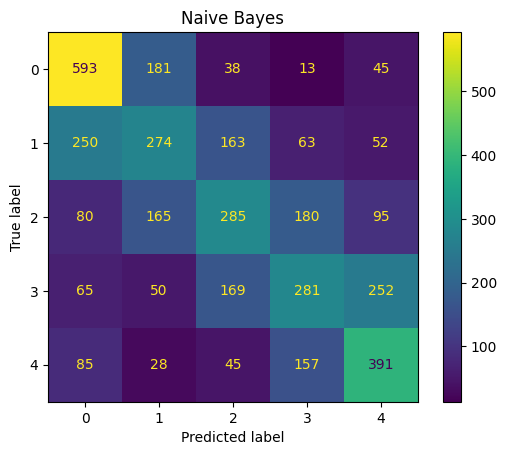

In [15]:
#Testing the model
y_pred_gaussian = full_pipeline_gaussian.predict(x_test_small)

#Printing performance metric
print("Overall accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_gaussian) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_gaussian) * 100.0))

#Visualizing performance using a confusion matrix
cm = confusion_matrix(y_test_encoded_small, y_pred_gaussian)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Naive Bayes")
plt.show()

In [16]:
#Logreg model from URL: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#Creating full Logistic Regression pipeline
full_pipeline_logreg = Pipeline([
    ('text_preprocessing', text_preprocessing), #Integrating text preprocessing pipeline
    ('classifier', LogisticRegression(verbose=True)) #Integrating classification method
])

In [17]:
#Training the model
full_pipeline_logreg.fit(x_train_small, y_train_encoded_small)

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x7cb977a5d2d0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier', LogisticRegression(verbose=True))])

Accuracy: 50.62%
One-off accuracy: 87.40%


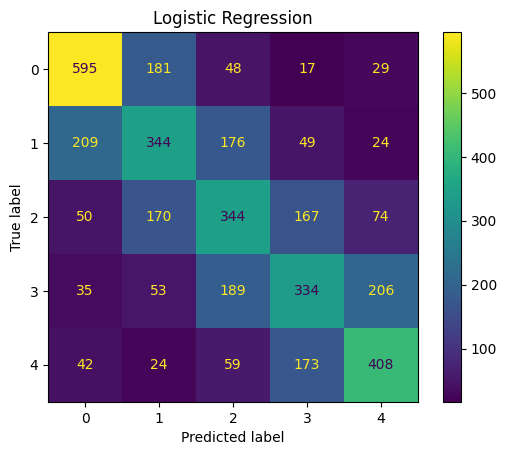

In [18]:
#Testing the model
y_pred_logreg = full_pipeline_logreg.predict(x_test_small)

#Printing performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_logreg) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_logreg) * 100.0))


#Visualizing performance using a confusion matrix
cm = confusion_matrix(y_test_encoded_small, y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Logistic Regression")
plt.show()

In [19]:
#Performing a grid seach on logreg to find optimal parameters

#Creating a grid of hyperparameters to search over
param_grid = {
    'text_preprocessing__tfidvectorizer__max_features': [2300, 2500], #Testing different numbers of max_features
    'classifier__C': [0.0001, 0.001],  #Testing different regularization strengths
    'classifier__penalty': ['l1', 'l2']  #Testing different regularizers
}

#Creating a GridSearchCV object
grid_search_logreg = GridSearchCV(
    full_pipeline_logreg, #Integrating full logreg pipeline
    param_grid, #Integrating the parameter grid
    verbose=1,  #Defining verbosity level for progress updates
    scoring='accuracy', #Defining scoring metric for evaluation
    cv=5 #Defining # of cross-validation folds
)

#Training the model
grid_search_logreg.fit(x_train_small, y_train_encoded_small.astype(np.int64))

#Printing the best hyperparameters
print("Best parameters found:", grid_search_logreg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

Best parameters found: {'classifier__C': 0.0001, 'classifier__penalty': 'l2', 'text_preprocessing__tfidvectorizer__max_features': 2500}


Accuracy: 52.80%
One-off accuracy: 89.45%


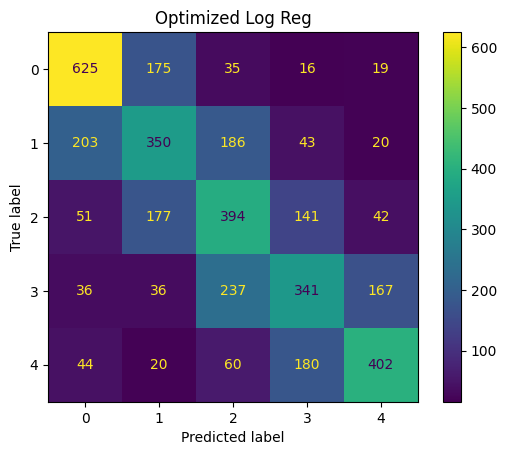

In [20]:
#Testing the model with optimized hyper parameters
y_pred_logreg_improved = grid_search_logreg.predict(x_test_small)

#Printing the performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_logreg_improved) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_logreg_improved) * 100.0))


#Visualizing the performance using confusion matrix
cm_nn_finetuned = confusion_matrix(y_test_encoded_small, y_pred_logreg_improved)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn_finetuned, display_labels=le.classes_)
disp.plot()
plt.title("Optimized Log Reg")
plt.show()

In [21]:
# SVM model from URL: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#Creating full SVM pipeline
full_pipeline_svm = Pipeline([
    ('text_preprocessing', text_preprocessing), #Integrating text preprocessing pipeline
    ('classifier', SVC(verbose=True)) #Integrating classification method
])

In [22]:
#Training the model
full_pipeline_svm.fit(x_train_small, y_train_encoded_small)

[LibSVM]

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x7cb977a5d2d0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier', SVC(verbose=True))])

Accuracy: 51.10%
One-off accuracy: 87.42%


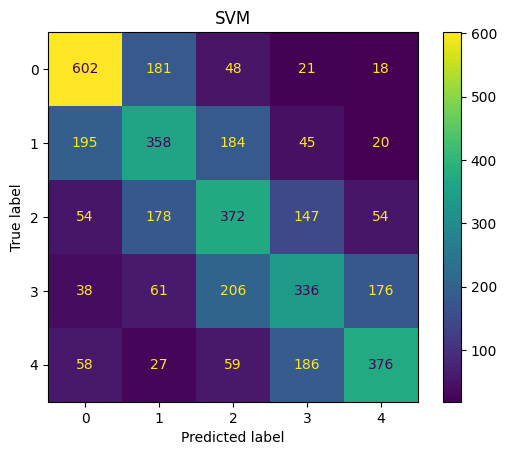

In [23]:
#Testing the model
y_pred_svm = full_pipeline_svm.predict(x_test_small)

#Printing performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_svm) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_svm) * 100.0))


#Visualizing performance using a confusion matrix
cm = confusion_matrix(y_test_encoded_small, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("SVM")
plt.show()

In [24]:
#MLP model from URL: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

#Creating full MLP pipeline
full_pipeline_mlp = Pipeline([
    ('text_preprocessing', text_preprocessing), #Integrating text preprocessing pipeline
    ('classifier', MLPClassifier( #Integrating classification method
        hidden_layer_sizes= (50, 50, 50), #Defining # of hidden layers and units
        max_iter= 25, #Defining maximum number of iterations
        alpha= 0.3, #Defining high l2 regularization term to prevent overfitting
        solver= 'sgd')) #Defining stochastic gradient descent as solver
])

In [25]:
#Training the model
full_pipeline_mlp.fit(x_train_small, y_train_encoded_small)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x7cb977a5d2d0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier',
                 MLPClassifier(alpha=0.3, hidden_layer_sizes=(50, 50, 50),
                               max_iter=25, solver='sgd'))])

Accuracy: 49.70%
One-off accuracy: 86.70%


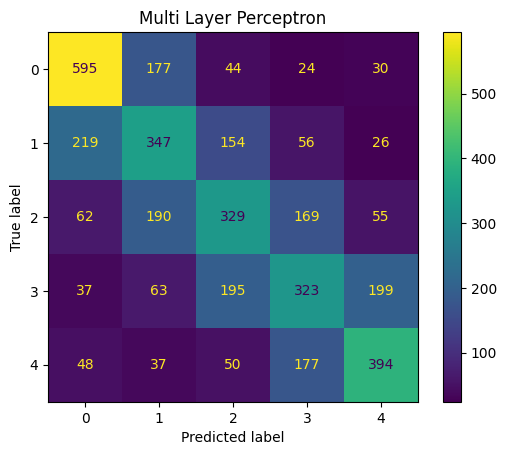

In [26]:
#Testing the model
y_pred_mlp = full_pipeline_mlp.predict(x_test_small)

#Printing performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_mlp) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_mlp) * 100.0))

#Visualizing performance using a confusion matrix
cm_mlp = confusion_matrix(y_test_encoded_small, y_pred_mlp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=le.classes_)
disp.plot()
plt.title("Multi Layer Perceptron")
plt.show()

In [27]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            num_units=300, #Number of units in hidden layers
            nonlin=F.relu, #Setting the non-linear activation function to Leaky ReLu
            dropout_prob=0.5 #Probability of dropout
    ):

        #Initializing parameters and neural network layers
        super(ClassifierModule, self).__init__()
        self.num_units = num_units
        self.nonlin = nonlin
        self.dropout_prob = dropout_prob

        #Defining the neural network architecture
        self.dense0 = nn.Linear(700, num_units)  #Input layer: 700 input features, num_units hidden units
        self.dropout1 = nn.Dropout(p=dropout_prob)  #Dropout layer to prevent overfitting
        self.dense1 = nn.Linear(num_units, 200)  #First hidden layer: num_units input units, 200 hidden units
        self.dense2 = nn.Linear(200, 100)  #Second hidden layer: 200 input units, 100 hidden units
        self.output = nn.Linear(100, 5)  #Output layer: 100 input units, 5 output units (for classification)

    def forward(self, X, **kwargs):
        #Defining the forward pass of the neural network
        X = self.nonlin(self.dense0(X))  #Applying activation to the input layer
        X = self.dropout1(X)  #Applying dropout to prevent overfitting
        X = self.nonlin(self.dense1(X))  #Applying activation to the first hidden layer
        X = self.nonlin(self.dense2(X))  #Applying activation to the second hidden layer
        X = self.output(X)  #Using output layer without activation
        return X.squeeze(dim=1)  #Squeezing the output to remove the extra dimension

In [28]:
#Creating the neural net classifier
net = NeuralNetClassifier(
    ClassifierModule,  #Integrating the classification method
    max_epochs=20,  #Defining the max. number of training iterations
    criterion=nn.CrossEntropyLoss(),  #Defining the loss function as cross entropy loss
    optimizer__lr=0.1,  #Defining the learning rate for the optimizer
    optimizer__weight_decay=1e-5,  #Defining the L2 regularization term top revent overfitting
    optimizer=torch.optim.Adam,  #Defining Adam as optimization algorithm
)

In [29]:
#Creating full neural net pipeline
full_pipeline_nn = Pipeline([
    ('text_preprocessing', text_preprocessing), #Integrating text preprocessing pipeline
    ('classifier', net) #Integrating neural net pipeline
])

In [30]:
#Training the model
full_pipeline_nn.fit(x_train_small, y_train_encoded_small.astype(np.int64))

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1       10.9413       0.1883        1.6468  0.8244
      2        1.7037       0.1880        1.6120  0.6120
      3        1.6131       0.1880        1.6109  0.6068
      4        1.6382       0.1880        1.6122  0.6090
      5        1.6153       0.1880        1.6104  0.6093
      6        3.3200       0.1880        1.6107  0.6141
      7        1.6114       0.1880        1.6105  0.6134
      8        1.6114       0.1880        1.6104  0.6132
      9        1.6115       0.1880        1.6104  0.6207
     10        1.6115       0.1880        1.6103  0.6137
     11        1.6115       0.1880        1.6102  0.6463
     12        1.6115       0.1880        1.6102  0.7008
     13        1.6115       0.1880        1.6102  0.7754
     14        1.6115       0.1880        1.6102  1.2944
     15        1.6115       0.1880        1.6101  1.3196
     16        1.6115       0.1

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x7cb977a5d2d0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier',
                 <class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ClassifierModule(
    (dense0): Linear(in_features=700, out_features=300, bias=True)
    (dropout1): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=300, out_features=200, bias=True)
    (dense2): Linear(in_features=200, out_features=100, bias=True)
    (output): Linear(in_features=100, out_features=5, bias=True)
  ),
))])

Accuracy: 21.75%
One-off accuracy: 41.80%


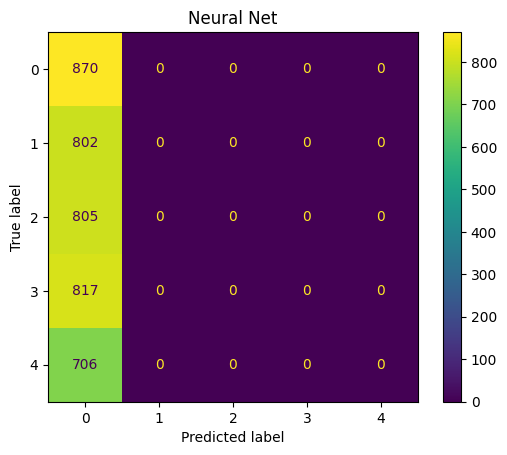

In [31]:
#Testing the model
y_pred_nn = full_pipeline_nn.predict(x_test_small)

#Printing the performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_nn) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_nn) * 100.0))

#Visualizing the performance using a confusion matrix
cm_nn = confusion_matrix(y_test_encoded_small, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=le.classes_)
disp.plot()
plt.title("Neural Net")
plt.show()

In [32]:
#Performing a grid seach to find optimal parameters

#Creating a grid of hyperparameters to search over
param_grid = {
    'classifier__module__num_units': [25, 50, 100], #Testing different numbers of units in hidden layers
    'classifier__module__nonlin': [F.relu, F.leaky_relu], #Testing different activation functions for hidden layers
    'classifier__max_epochs': [5, 10], #Testing maximum number of training iterations
    'classifier__optimizer': [torch.optim.SGD, torch.optim.Adam], #Testing different optimization algorithms
    'text_preprocessing__tfidvectorizer__analyzer': ['word', 'char'], #Testing different types of text analyses (word or character-level)
    'text_preprocessing__tfidvectorizer__ngram_range': [(1, 1), (2, 2)], #Testing different ranges of n-grams
}

#Creating a GridSearchCV object
grid_search_nn = GridSearchCV(
    full_pipeline_nn,  #Integrating full neural network pipeline
    param_grid,  #Integrating the parameter grid
    scoring='accuracy',  #Defining scoring metric for evaluation
    verbose=1,  #Defining verbosity level for progress updates
    cv=3  #Defining # of cross-validation folds
)

#Training the model
grid_search_nn.fit(x_train_small, y_train_encoded_small.astype(np.int64))

#Printing the best hyperparameters
print("Best parameters found:", grid_search_nn.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.6018       0.2977        1.5935  0.2588
      2        1.5214       0.3960        1.3887  0.2631
      3        1.3239       0.4679        1.2441  0.3286
      4        1.2124       0.4784        1.1883  0.3659
      5        1.1615       0.4841        1.1685  0.3158
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.6026       0.2760        1.5962  0.2484
      2        1.5567       0.3791        1.4668  0.2475
      3        1.3688       0.4608        1.2451  0.2915
      4        1.2185       0.4878        1.1740  0.2804
      5        1.1506       0.4987        1.1677  0.3117
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.5983     

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/skorch/classifier.py", line 165, in fit
    return super(NeuralNetClassifier, self).fit(X, y, **fit_params)
  File "/us

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.5985       0.3290        1.5807  0.5200
      2        1.4376       0.4778        1.2124  0.4293
      3        1.1827       0.4995        1.1421  0.4020
      4        1.1189       0.5088        1.1396  0.4021
      5        1.0692       0.4960        1.1418  0.3959
      6        1.0433       0.5045        1.1445  0.4124
      7        1.0171       0.4968        1.1578  0.3983
      8        0.9970       0.4970        1.1639  0.4091
      9        0.9676       0.4903        1.1833  0.4093
     10        0.9417       0.4913        1.1992  0.4106
Best parameters found: {'classifier__max_epochs': 10, 'classifier__module__nonlin': <function leaky_relu at 0x7cb9a4d5beb0>, 'classifier__module__num_units': 100, 'classifier__optimizer': <class 'torch.optim.sgd.SGD'>, 'text_preprocessing__tfidvectorizer__analyzer': 'word', 'text_preprocessing__tfidvectorizer__ngra

Accuracy: 49.95%
One-off accuracy: 88.45%


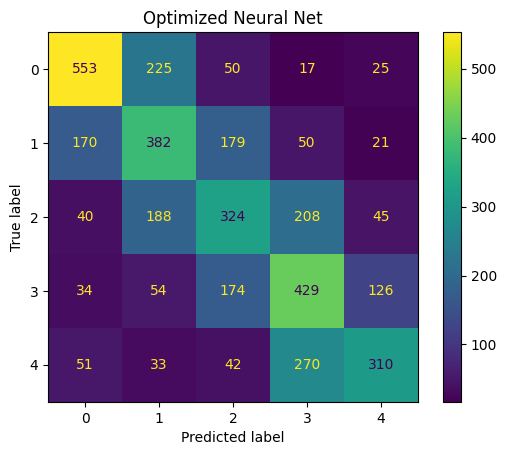

In [33]:
#Testing the model with optimized hyper parameters
y_pred_nn_improved = grid_search_nn.predict(x_test_small)

#Printing the performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_nn_improved) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_nn_improved) * 100.0))


#Visualizing the performance using confusion matrix
cm_nn_finetuned = confusion_matrix(y_test_encoded_small, y_pred_nn_improved)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn_finetuned, display_labels=le.classes_)
disp.plot()
plt.title("Optimized Neural Net")
plt.show()

In [34]:
#Examining wrongly classified samples (4,0) and (0,4), whereby (a,b) = (true label, false label)

#Merging text data and label data
df_true = pd.DataFrame({'text': x_test_small, 'label': y_test_encoded_small})
df_pred = pd.DataFrame({'text': x_test_small, 'label': y_pred_logreg})

#Filtering for samples (4,0)
filtered_true = df_true[df_true['label'] == 4]
filtered_pred = df_pred[df_pred['label'] == 0]
merged_4_0 = pd.merge(filtered_true, filtered_pred, on='text', how='inner', suffixes=('_true', '_pred'))

#Filtering for samples (0,4)
filtered_true = df_true[df_true['label'] == 0]
filtered_pred = df_pred[df_pred['label'] == 4]
merged_0_4 = pd.merge(filtered_true, filtered_pred, on='text', how='inner', suffixes=('_true', '_pred'))

#Examining filtered samples
pd.set_option('display.max_colwidth', -1)
print(merged_4_0['text'])
print(merged_0_4['text'])

0     platinum blonde perfection jay work wonder given best platinum blonde do ever gorgeous hair looked like corn silk boatload money id fly la every 6 week touch up go see jaytell laura la sent you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<ipython-input-34-155070cde4b5>:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [35]:
#Analyzing feature importance on the Logistic Regression model

#Extracting feature names from TF-IDF vectorizer in the text preprocessing pipeline
feature_names_list = full_pipeline_logreg.named_steps['text_preprocessing'].named_steps['tfidvectorizer'].get_feature_names_out()

#Using eli5 to explain the weights of the SVM model
eli5.explain_weights(
    full_pipeline_logreg['classifier'], #Defining the classifier model
    top=10, #Defining # of top features to display
    feature_names=feature_names_list #Defining names of features
)

Explanation(estimator='LogisticRegression(verbose=True)', description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='worst', weight=0.4174172815667725, std=None, value=None), FeatureWeight(feature='horrible', weight=0.30280099336904576, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-0.8355694927196656, std=None, value=None), FeatureWeight(feature='great', weight=-0.582627593140926, std=None, value=None), FeatureWeight(feature='friendly', weight=-0.3454053104744195, std=None, value=None), FeatureWeight(feature='excellent', weight=-0.3430554937570089, std=None, value=None), FeatureWeight(feature='delicious', weight=-0.31758401861761715, std=None, value=None), FeatureWeight(feature='love', weight=-0.31659892258928846, std=None, value=None), FeatureWeight(feature='amazing', weight=-0.3139534392404945, std=None, value=None), FeatureWeight(feature='best', weight=-0.3056972415831005, std=None, value=None)], pos_remaining=338, neg_remaining=353), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.45679716232587664, std=None, value=None), FeatureWeight(feature='bland', weight=0.2161492740130143, std=None, value=None), FeatureWeight(feature='worst', weight=0.2028205779582646, std=None, value=None), FeatureWeight(feature='ok', weight=0.19141619248329628, std=None, value=None), FeatureWeight(feature='terrible', weight=0.1871286068600463, std=None, value=None), FeatureWeight(feature='mediocre', weight=0.18275533372977326, std=None, value=None)], neg=[FeatureWeight(feature='delicious', weight=-0.2668122450037657, std=None, value=None), FeatureWeight(feature='great', weight=-0.22300677164733224, std=None, value=None), FeatureWeight(feature='perfect', weight=-0.17644842771161304, std=None, value=None), FeatureWeight(feature='love', weight=-0.16821092194418058, std=None, value=None)], pos_remaining=364, neg_remaining=327), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.7207124584522913, std=None, value=None), FeatureWeight(feature='ok', weight=0.18815769416518113, std=None, value=None), FeatureWeight(feature='decent', weight=0.17662427897786762, std=None, value=None), FeatureWeight(feature='good', weight=0.17139512277147312, std=None, value=None), FeatureWeight(feature='bit', weight=0.15101791554453034, std=None, value=None), FeatureWeight(feature='average', weight=0.13491257184387376, std=None, value=None), FeatureWeight(feature='okay', weight=0.12430752352302452, std=None, value=None), FeatureWeight(feature='pretty', weight=0.1161004814870576, std=None, value=None)], neg=[FeatureWeight(feature='even', weight=-0.13874657685750594, std=None, value=None), FeatureWeight(feature='extremely', weight=-0.12080886103630699, std=None, value=None)], pos_remaining=372, neg_remaining=319), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=3, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='great', weight=0.3459685296201521, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.26404118436226226, std=None, value=None), FeatureWeight(feature='delicious', weight=0.24944828362772337, std=None, value=None), FeatureWeight(feature='love', weight=0.2003214404

In [45]:
#Initializing the robustness test

explanation = eli5.explain_weights(
    full_pipeline_logreg['classifier'],  # Refers to your logistic regression classifier
    top=50,  # You want the top 10 features
    feature_names=feature_names_list  # Your extracted feature names
)

#Extracting feature names
nr_labels = 5
word_list = []
for label in range(nr_labels):
  feature_weights = explanation.targets[label].feature_weights
  top_features = feature_weights.pos
  top_feature_names = [feature.feature for feature in top_features]
  word_list.extend(top_feature_names)

#Combined lists of top features per feature
print(word_list)

['worst', 'horrible', 'terrible', 'awful', 'rude', 'bland', 'poor', 'money', 'even', 'dirty', 'never', 'manager', 'business', 'told', 'bad', 'overpriced', 'tasted', 'cold', 'customer', '<BIAS>', 'bland', 'worst', 'ok', 'terrible', 'mediocre', 'overpriced', 'rude', 'poor', 'horrible', 'okay', 'average', 'used', 'however', 'dry', 'awful', 'nothing', 'disappointed', 'better', 'food', 'ordered', 'asked', 'slow', 'unfortunately', 'left', 'decent', 'dirty', 'bad', 'sorry', 'maybe', '<BIAS>', 'ok', 'decent', 'good', 'bit', 'average', 'okay', 'pretty', 'though', 'however', 'nice', 'tasty', 'star', 'little', 'friendly', 'lunch', 'nothing', 'pretty good', 'bad', 'id', 'spot', 'especially', 'bland', 'fine', 'airport', 'quick', 'come back', 'late', 'probably', 'seem', 'great', '<BIAS>', 'delicious', 'love', 'excellent', 'good', 'fantastic', 'awesome', 'best', 'perfect', 'favorite', 'friendly', 'amazing', 'little', 'wonderful', 'definitely', 'nice', 'enjoyed', 'pretty', 'bit', 'tasty', 'always', 'f

In [37]:
#Robustness testing of the logistic regression model by replacing the top determining words per feature in x_test_small with synonyms

#Getting potential synonyms for a word
def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

#Generating a synonym dictionary where each key, value pair is a determining word and its synonym respectively
def generate_synonym_dict(word_list):
    synonym_dict = {}
    for word in word_list:
        synonyms = get_synonyms(word)
        if synonyms:
            synonyms = [syn for syn in synonyms if syn != word] #Excluding the word itself from the list of synonyms
            if synonyms: #Checking if there are synonyms left after excluding the word itself
                synonym_dict[word] = synonyms[0] #Picking the first synonym
    return synonym_dict

synonym_dict = generate_synonym_dict(word_list)

#Replacing each top feature word in x_test_small with its corresponding snyonym
for idx, row in enumerate(x_test_small):
    for key, val in synonym_dict.items():
        if key in row:
            x_test_small[idx] = row.replace(key, val)

Accuracy: 52.02%
One-off accuracy: 88.40%


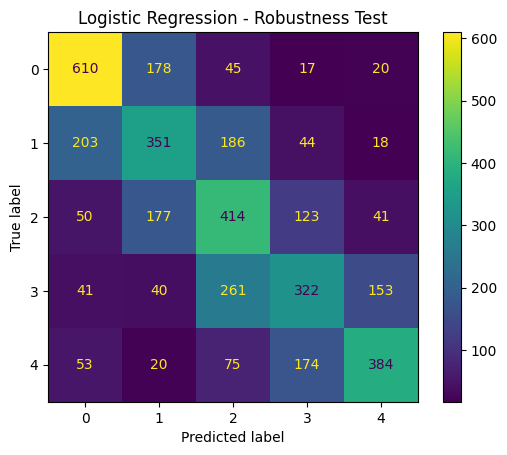

In [43]:
#Testing the robustness of the model
y_pred_logreg_synonym = grid_search_logreg.predict(x_test_small)

#Printing the performance metric
print("Accuracy: %.2f%%" % (accuracy_score(y_test_encoded_small, y_pred_logreg_synonym) * 100.0))
print("One-off accuracy: %.2f%%" % (one_off_accuracy(y_test_encoded_small, y_pred_logreg_synonym) * 100.0))

#Visualizing the performance using confusion matrix
cm = confusion_matrix(y_test_encoded_small, y_pred_logreg_synonym)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot()
plt.title("Logistic Regression - Robustness Test")
plt.show()

In [39]:
#Testing Logreg with adversarial samples

#List of deceptively positive reviews
dpr = [
    "Their lobby décor is amazing, it looks straight out of a magazine. But don’t be deceived, my room felt bland and lacked basic amenities.",
    "The ambiance gives a wonderful illusion of tranquility. Yet, their signature massage was so mediocre it barely made a difference.",
    "Their garage is state-of-the-art and looks fantastic. Sadly, the repair on my car was disappointing, barely lasting a week.",
    "The storefront is decorated incredibly, pulling you right in. But the actual quality of the clothes? Disappointing and overpriced.",
    "The trailers they showcased were outstanding, but the actual movie was a letdown, filled with tasteless jokes.",
    "Their latte art is the best I've ever seen. Flavor-wise though? Completely bland.",
    "The presentation of the dishes was amazing. But don’t be fooled, the taste was quite average.",
    "The equipment variety is excellent, but it's always so dirty, it feels gross to touch anything.",
    "The hairdresser's station looked wonderful, but the haircut I received was far from perfect.",
    "The layout of the store is fantastic and very inviting. Unfortunately, their collection is lackluster and outdated."
]

#List of deceptively negative reviews
dnr = [
    "I was told the view from the rooms was horribly captivating. They weren't wrong. I spent hours just gazing outside!",
    "I heard their facials can be terribly relaxing. By the end of it, I felt rejuvenated like never before.",
    "People warned me their detailing service was disgustingly thorough. My car never looked cleaner!",
    "Friends said their summer collection was shockingly trendy. I left with bags full of the latest styles!",
    "I read reviews that the sound system in this theater was disappointingly clear. It felt like the band was playing live just for me!",
    "Was told their desserts might be awfully rich and indulgent. It was a delightful treat to my taste buds!",
    "Heard the pasta here is horribly delicious. I wasn't disappointed; it was the best I've ever had.",
    "Someone mentioned that the trainers here are terribly motivating. I felt so pumped and energized after the session!",
    "A friend said their hair treatments can be dangerously good. My hair has never felt silkier!",
    "The store owner warned that their new arrivals section is disappointingly engrossing. I lost track of time browsing through!"
]

#Processing data to ensure comparability
processed_dpr = text_processing(dpr)
processed_dnr = text_processing(dnr)

#Testing the models against the adversarial samples
prediction_dpr_nb = full_pipeline_gaussian.predict(processed_dpr)
prediction_dnr_nb = full_pipeline_gaussian.predict(processed_dnr)

prediction_dpr_logreg = grid_search_logreg.predict(processed_dpr)
prediction_dnr_logreg = grid_search_logreg.predict(processed_dnr)

prediction_dpr_svm = full_pipeline_svm.predict(processed_dpr)
prediction_dnr_svm = full_pipeline_svm.predict(processed_dnr)

prediction_dpr_mlp = full_pipeline_mlp.predict(processed_dpr)
prediction_dnr_mlp = full_pipeline_mlp.predict(processed_dnr)

prediction_dpr_nn = grid_search_nn.predict(processed_dpr)
prediction_dnr_nn = grid_search_nn.predict(processed_dnr)

#Printing the performance metric
adversarial_comp = []
adversarial_comp.append([np.mean(prediction_dpr_nb), np.mean(prediction_dnr_nb)])
adversarial_comp.append([np.mean(prediction_dpr_logreg), np.mean(prediction_dnr_logreg)])
adversarial_comp.append([np.mean(prediction_dpr_svm), np.mean(prediction_dnr_svm)])
adversarial_comp.append([np.mean(prediction_dpr_mlp), np.mean(prediction_dnr_mlp)])
adversarial_comp.append([np.mean(prediction_dpr_nn), np.mean(prediction_dnr_nn)])

print(adversarial_comp)

[[2.1, 0.6], [1.7, 1.4], [2.0, 0.5], [2.0, 0.7], [1.7, 0.5]]


In [40]:
#Analyzing feature importance of the adversarial samples

#Extracting feature names from TF-IDF vectorizer in the text preprocessing pipeline
feature_names_list = full_pipeline_logreg.named_steps['text_preprocessing'].named_steps['tfidvectorizer'].get_feature_names_out()

#Using eli5 to explain the prediction of the model
eli5.explain_prediction(
    full_pipeline_logreg['classifier'], #Defining the classifier model
    processed_dnr[2], #Defining the input data
    vec=full_pipeline_logreg['text_preprocessing'], #Defining the text preprocessing pipeline
    feature_names=feature_names_list  #Defining names of features
)

Explanation(estimator='LogisticRegression(verbose=True)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='looked', weight=1.2298296183210027, std=None, value=15.993491172790527), FeatureWeight(feature='never', weight=0.9421042484799435, std=None, value=7.411394119262695), FeatureWeight(feature='people', weight=0.4731572903978564, std=None, value=7.567004203796387), FeatureWeight(feature='great', weight=0.2652719251666492, std=None, value=-0.45530271530151367), FeatureWeight(feature='car', weight=0.20792100532584384, std=None, value=9.305444717407227), FeatureWeight(feature='good', weight=0.18475045193281844, std=None, value=-0.620099663734436), FeatureWeight(feature='friendly', weight=0.10777855440098726, std=None, value=-0.3120350241661072), FeatureWeight(feature='best', weight=0.09900161137303577, std=None, value=-0.32385510206222534), FeatureWeight(feature='love', weight=0.09179280440605637, std=None, value=-0.28993403911590576), FeatureWeight(feature='nice', weight=0.08498755824398783, std=None, value=-0.3618466556072235), FeatureWeight(feature='delicious', weight=0.07739788418738514, std=None, value=-0.24370837211608887), FeatureWeight(feature='little', weight=0.06977195810994956, std=None, value=-0.35137975215911865), FeatureWeight(feature='excellent', weight=0.0641843003392706, std=None, value=-0.18709596991539001), FeatureWeight(feature='amazing', weight=0.06404171453638954, std=None, value=-0.20398475229740143), FeatureWeight(feature='favorite', weight=0.06036988931787904, std=None, value=-0.22035634517669678), FeatureWeight(feature='pretty', weight=0.04979181688852632, std=None, value=-0.3494033217430115), FeatureWeight(feature='bit', weight=0.04888731585442298, std=None, value=-0.26322290301322937), FeatureWeight(feature='awesome', weight=0.0465324539952732, std=None, value=-0.18785135447978973), FeatureWeight(feature='definitely', weight=0.04639132488776762, std=None, value=-0.2707374095916748), FeatureWeight(feature='tasty', weight=0.043235536490041845, std=None, value=-0.19829128682613373), FeatureWeight(feature='always', weight=0.04073143484441093, std=None, value=-0.3339594602584839), FeatureWeight(feature='fantastic', weight=0.0404174975065051, std=None, value=-0.14238186180591583), FeatureWeight(feature='also', weight=0.03710505666074727, std=None, value=-0.39337998628616333), FeatureWeight(feature='perfect', weight=0.03427259373097687, std=None, value=-0.16628174483776093), FeatureWeight(feature='ive', weight=0.032813567030002294, std=None, value=-0.3615455627441406), FeatureWeight(feature='well', weight=0.032611363655584265, std=None, value=-0.364685982465744), FeatureWeight(feature='lunch', weight=0.03244467769421042, std=None, value=-0.27473562955856323), FeatureWeight(feature='special', weight=0.03199859589727368, std=None, value=-0.2455885112285614), FeatureWeight(feature='im', weight=0.031446988776300415, std=None, value=-0.3700452446937561), FeatureWeight(feature='though', weight=0.02907983608961669, std=None, value=-0.28621426224708557), FeatureWeight(feature='star', weight=0.02867868886334237, std=None, value=-0.27017879486083984), FeatureWeight(feature='clean', weight=0.028466198994298555, std=None, value=-0.20312033593654633), FeatureWeight(feature='enjoyed', weight=0.023941511223136095, std=None, value=-0.1636599749326706), FeatureWeight(feature='right', weight=0.023430286485500336, std=None, value=-0.2923760414123535), FeatureWeight(feature='fresh', weight=0.02293742089581501, std=None, value=-0.22864456474781036), FeatureWeight(feature='selection', weight=0.02286451660442752, std=None, value=-0.22941868007183075), FeatureWeight(feature='helpful', weight=0.022720810051259317, std=None, value=-0.1500691920518875), FeatureWeight(feature='like', weight=0.022155162766443526, std=None, value=-0.5656513571739197), FeatureWeight(feature='quick', weight=0.02095755553317614, std=None,

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


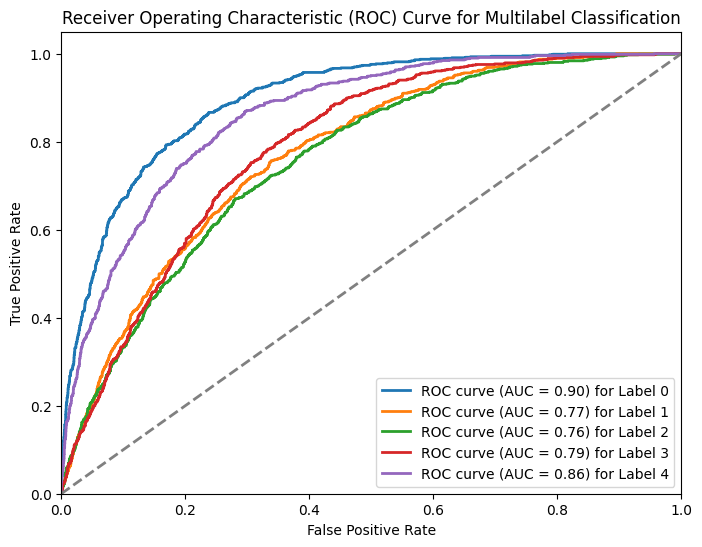

In [44]:
#Generating ROC curve

#Obtaining unencoded labels and reshaping them
y_test_small = np.array(dataset['test']['label'][:4000])
y_test_small = y_test_small.reshape(-1,1)
n_labels = 5

#Initializing the OneHotEncoder and transforming the labels to a binary matrix
encoder = OneHotEncoder(sparse=False, categories='auto')
binary_matrix = encoder.fit_transform(y_test_small)

#Obtaining predicted probabilities for each label
predicted_probabilities = full_pipeline_logreg.predict_proba(x_test_small)

#Computing ROC curve and AUC for each label
fpr = dict() #False positive rate
tpr = dict() #True positive rate
roc_auc = dict()

#Iterating over all labels and computing the ROC and AUC
for i in range(n_labels):
    fpr[i], tpr[i], _ = roc_curve(binary_matrix[:,i], predicted_probabilities[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Visualizing ROC curves for each label
plt.figure(figsize=(8, 6))
for i in range(n_labels):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (AUC = {roc_auc[i]:.2f}) for Label {i}')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multilabel Classification')
plt.legend(loc='lower right')
plt.show()